<a href="https://colab.research.google.com/github/tutur90/Weather-Forecast/blob/main/Map_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import missingno as msno

#Local
df = pd.read_csv('data/mapdata.csv', header=[0,1], index_col=[0,1])

#Colab
# df = pd.read_csv('https://raw.githubusercontent.com/tutur90/Weather-Forecast/main/data/mapdata.csv', header=[0,1])


df.index.names = ['Latitude', 'Longitude']

new_columns = []
current_name = ''

for col in df.columns:
    if 'Unnamed' not in col[0]:
        current_name = col[0]
    new_columns.append((current_name, col[1]))

df.columns = pd.MultiIndex.from_tuples(new_columns)
df.to_csv("data/mapdata_processed.csv")

df

T_AVG_EH                                              \
                        1990-1994  1995-1999  2000-2004  2005-2009  2010-2013   
Latitude    Longitude                                                           
500238.433  9757716.35  26.241653  26.431744  26.205169  25.623458  25.500149   
501238.433  9756716.35  26.276430  26.472976  26.248354  25.640990  25.518365   
            9757716.35  26.250309  26.445153  26.217235  25.670272  25.504583   
502238.433  9755716.35  26.298148  26.500389  26.276984  25.684519  25.562800   
            9756716.35  26.296136  26.498092  26.272711  25.661937  25.540316   
...                           ...        ...        ...        ...        ...   
1145238.433 9892716.35  25.233935  25.372867  25.568853  25.320505  25.266802   
            9893716.35  25.233274  25.370885  25.567556  25.317194  25.264276   
1146238.433 9891716.35  25.250690  25.392907  25.587620  25.329543  25.276539   
            9892716.35  25.246185  25.386656  25.582197  25.325857  25.273676   
1147238.433 9891716.35  25.252752  25.395376  25.590020  25.333612  25.281513   

                         T_AVG_ES                                              \
                        1990-1994  1995-1999  2000-2004  2005-2009  2010-2013   
Latitude    Longitude                                                           
500238.433  9757716.35  23.211798  24.921022  24.136960  24.842993  24.321621   
501238.433  9756716.35  23.216478  24.946658  24.158758  24.868181  24.349748   
            9757716.35  23.234939  24.930630  24.147188  24.850846  24.333194   
502238.433  9755716.35  23.233070  24.963670  24.173251  24.884370  24.368899   
            9756716.35  23.227812  24.963483  24.168645  24.883550  24.368832   
...                           ...        ...        ...        ...        ...   
1145238.433 9892716.35  25.990606  26.455063  25.850696  25.913499  25.961364   
            9893716.35  25.988053  26.452401  25.846256  25.912175  25.960120   
1146238.433 9891716.35  25.999149  26.478185  25.861416  25.926693  25.977769   
            9892716.35  25.996260  26.471587  25.857181  25.922181  25.973488   
1147238.433 9891716.35  26.003556  26.484082  25.863806  25.926775  25.981629   

                        ...   T_MIN_EH                                   \
                        ...  1990-1994  1995-1999  2000-2004  2005-2009   
Latitude    Longitude   ...                                               
500238.433  9757716.35  ...  22.750114  20.888282  21.299084  21.074153   
501238.433  9756716.35  ...  21.400455  20.931939  21.344305  21.115768   
            9757716.35  ...  21.603656  20.914635  21.319373  21.094308   
502238.433  9755716.35  ...  21.458458  20.963566  21.377115  21.145678   
            9756716.35  ...  21.813207  20.968519  21.375084  21.145874   
...                     ...        ...        ...        ...        ...   
1145238.433 9892716.35  ...        NaN  22.128786  22.451011  22.255762   
            9893716.35  ...        NaN  22.127190  22.449209  22.252206   
1146238.433 9891716.35  ...        NaN  22.159800  22.477580  22.283775   
            9892716.35  ...        NaN  22.152486  22.470855  22.274527   
1147238.433 9891716.35  ...        NaN  22.168329  22.484293  22.287406   

                                    T_MIN_ES                                   \
                        2010-2013  1990-1994  1995-1999  2000-2004  2005-2009   
Latitude    Longitude                                                           
500238.433  9757716.35  20.003842  18.715838  18.442846  17.972751  19.400676   
501238.433  9756716.35  20.045958  18.743299  18.475342  18.006228  19.436622   
            9757716.35  20.030165  18.731016  18.466860  17.996674  19.418912   
502238.433  9755716.35  20.076691  18.761481  18.500737  18.031218  19.460895   
            9756716.35  20.082033  18.766453  18.505476  18.029859  19.464830   
...                           ...        ...        ... 

<Axes: >

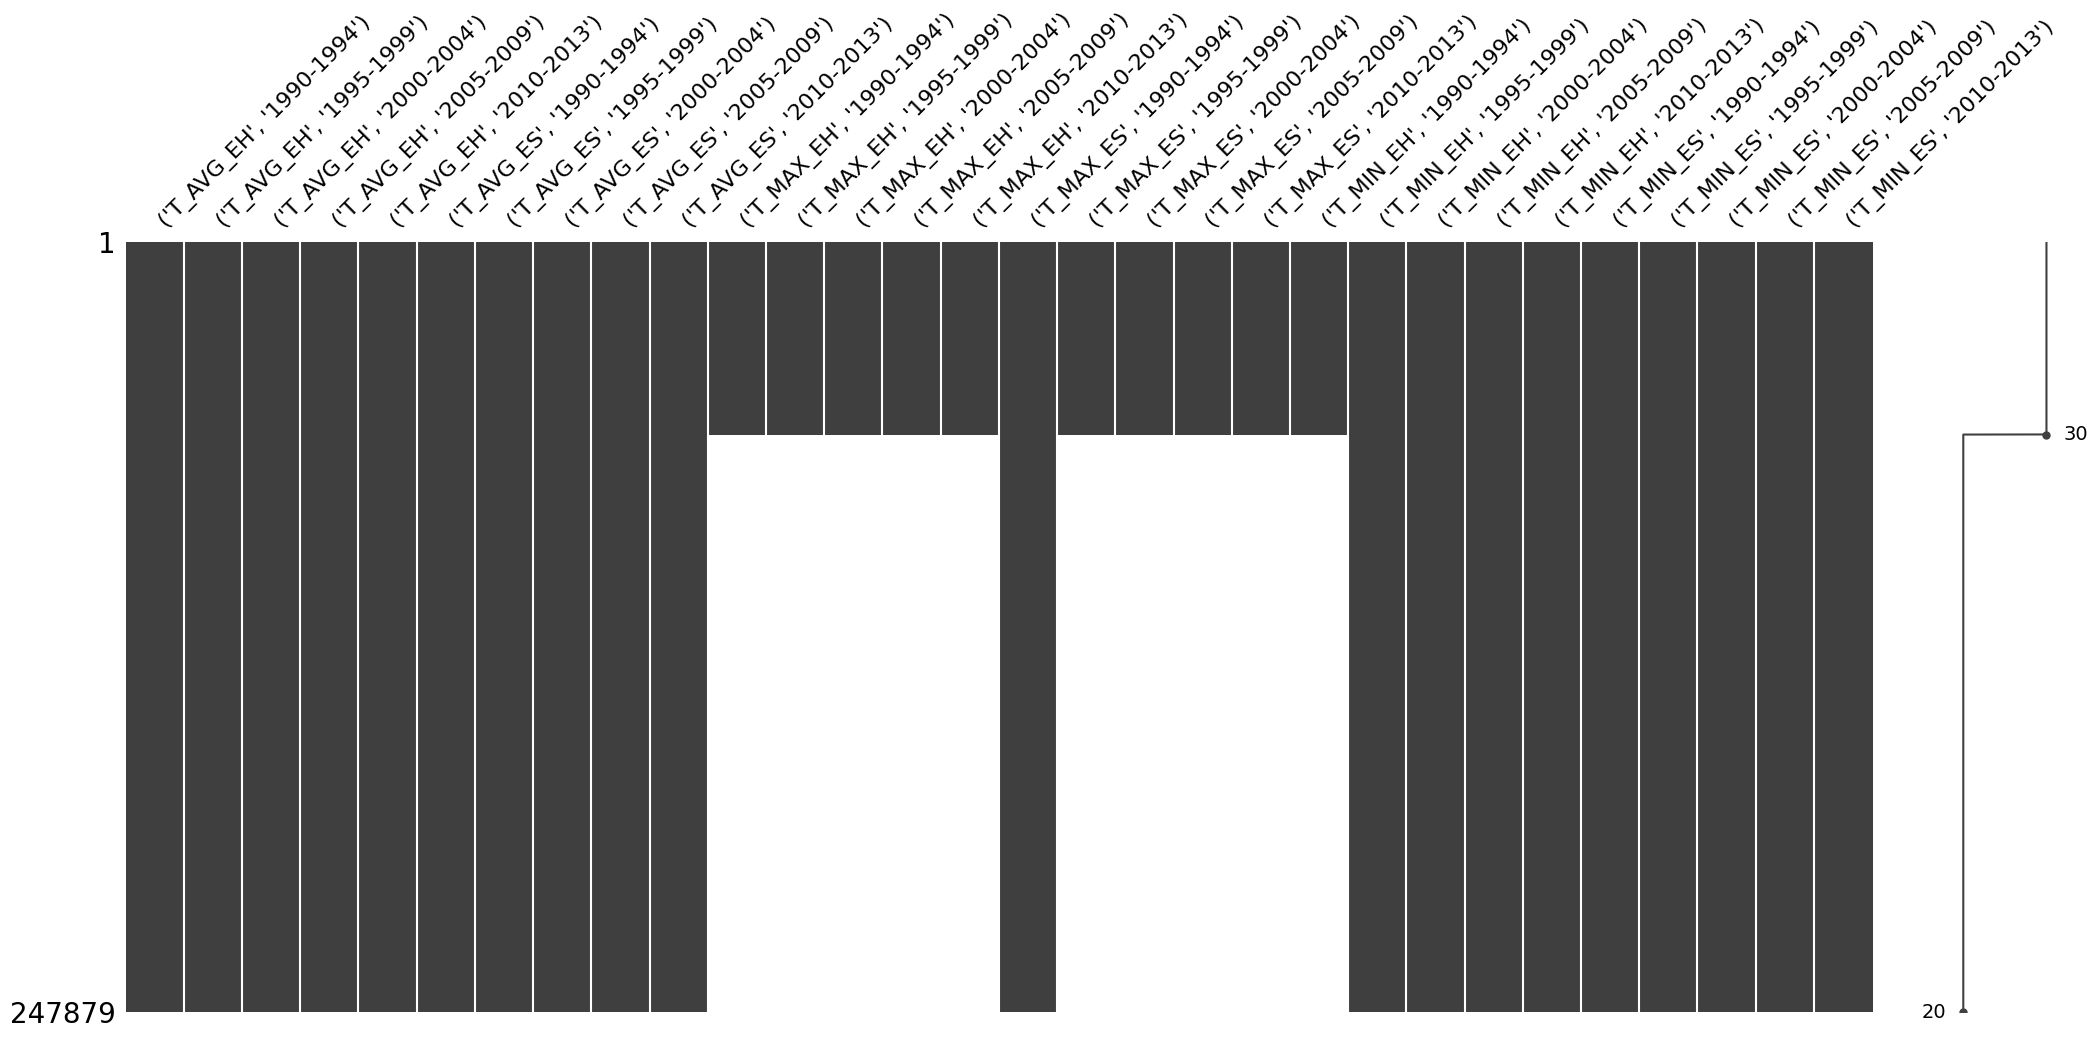

In [12]:
msno.matrix(df)

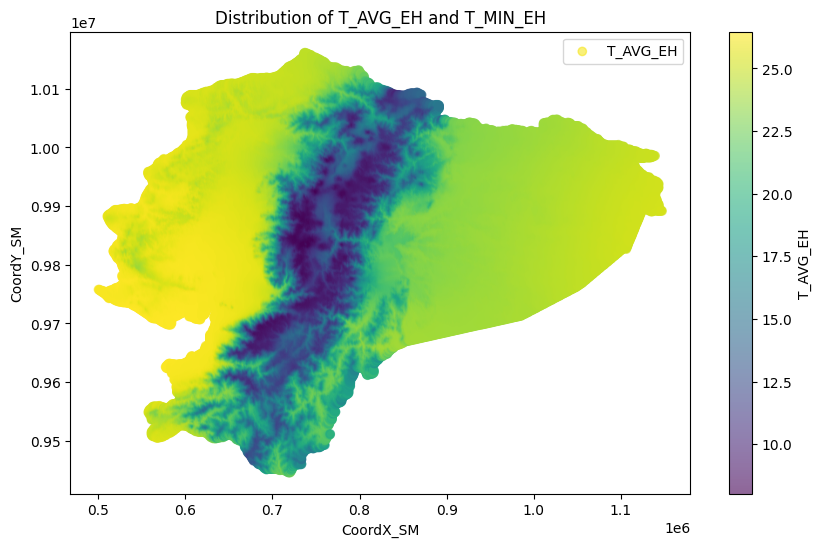

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


# Tracer T_AVG_EH
plt.scatter(df.index.get_level_values('Latitude'), df.index.get_level_values('Longitude'), c=df[('T_AVG_EH','1990-1994')], cmap='viridis', label='T_AVG_EH', alpha=0.6)
plt.colorbar(label='T_AVG_EH')

plt.xlabel('CoordX_SM')
plt.ylabel('CoordY_SM')
plt.legend()
plt.title('Distribution of T_AVG_EH and T_MIN_EH')
plt.show()

In [14]:
T = []
date = []
for c in df.columns:
  if c[0] not in T and c[0] != '':
    
    T.append(c[0])
    
  if c[1] not in date and c[1] != '':

    date.append(c[1])
date, T

(['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2013'],
 ['T_AVG_EH', 'T_AVG_ES', 'T_MAX_EH', 'T_MAX_ES', 'T_MIN_EH', 'T_MIN_ES'])

In [15]:
import numpy as np
years = np.array([int(year[-4:]) for year in date])
years

array([1994, 1999, 2004, 2009, 2013])

In [16]:
from sklearn.linear_model import LinearRegression

years_to_predict = np.concatenate((years, [years[-1] + 5]))

n_df = df.copy()

for t in T:
    
    dt = df[t]
    
    slopes = []
    next_5 = []
    
    if dt.isnull().sum().sum() > 0:
        print(f'{t} has missing values')
    else:
        for index, row in dt.iterrows():
            reg = LinearRegression().fit(years.reshape(-1, 1), row.values)
            slopes += [reg.coef_[0]]
            next_5 += [years_to_predict[-1]*reg.coef_[0]+reg.intercept_]
        n_df[(t, 'slope')] = slopes
        n_df[(t, 'prediction')] = next_5
            
    # plt.plot(years, slopes, label=t)
    # plt.plot(years_to_predict, next_5, label=t+'_5y')
    
    # plt.legend()    
        
    # plt.xlabel('Year')

    # plt.ylabel('Slope')
    # plt.title('Slope of the linear regression of the temperature for each location')
        
    # plt.show()
    

    
df
  

  

T_MAX_EH has missing values
T_MAX_ES has missing values
T_MIN_EH has missing values


T_AVG_EH                                              \
                        1990-1994  1995-1999  2000-2004  2005-2009  2010-2013   
Latitude    Longitude                                                           
500238.433  9757716.35  26.241653  26.431744  26.205169  25.623458  25.500149   
501238.433  9756716.35  26.276430  26.472976  26.248354  25.640990  25.518365   
            9757716.35  26.250309  26.445153  26.217235  25.670272  25.504583   
502238.433  9755716.35  26.298148  26.500389  26.276984  25.684519  25.562800   
            9756716.35  26.296136  26.498092  26.272711  25.661937  25.540316   
...                           ...        ...        ...        ...        ...   
1145238.433 9892716.35  25.233935  25.372867  25.568853  25.320505  25.266802   
            9893716.35  25.233274  25.370885  25.567556  25.317194  25.264276   
1146238.433 9891716.35  25.250690  25.392907  25.587620  25.329543  25.276539   
            9892716.35  25.246185  25.386656  25.582197  25.325857  25.273676   
1147238.433 9891716.35  25.252752  25.395376  25.590020  25.333612  25.281513   

                         T_AVG_ES                                              \
                        1990-1994  1995-1999  2000-2004  2005-2009  2010-2013   
Latitude    Longitude                                                           
500238.433  9757716.35  23.211798  24.921022  24.136960  24.842993  24.321621   
501238.433  9756716.35  23.216478  24.946658  24.158758  24.868181  24.349748   
            9757716.35  23.234939  24.930630  24.147188  24.850846  24.333194   
502238.433  9755716.35  23.233070  24.963670  24.173251  24.884370  24.368899   
            9756716.35  23.227812  24.963483  24.168645  24.883550  24.368832   
...                           ...        ...        ...        ...        ...   
1145238.433 9892716.35  25.990606  26.455063  25.850696  25.913499  25.961364   
            9893716.35  25.988053  26.452401  25.846256  25.912175  25.960120   
1146238.433 9891716.35  25.999149  26.478185  25.861416  25.926693  25.977769   
            9892716.35  25.996260  26.471587  25.857181  25.922181  25.973488   
1147238.433 9891716.35  26.003556  26.484082  25.863806  25.926775  25.981629   

                        ...   T_MIN_EH                                   \
                        ...  1990-1994  1995-1999  2000-2004  2005-2009   
Latitude    Longitude   ...                                               
500238.433  9757716.35  ...  22.750114  20.888282  21.299084  21.074153   
501238.433  9756716.35  ...  21.400455  20.931939  21.344305  21.115768   
            9757716.35  ...  21.603656  20.914635  21.319373  21.094308   
502238.433  9755716.35  ...  21.458458  20.963566  21.377115  21.145678   
            9756716.35  ...  21.813207  20.968519  21.375084  21.145874   
...                     ...        ...        ...        ...        ...   
1145238.433 9892716.35  ...        NaN  22.128786  22.451011  22.255762   
            9893716.35  ...        NaN  22.127190  22.449209  22.252206   
1146238.433 9891716.35  ...        NaN  22.159800  22.477580  22.283775   
            9892716.35  ...        NaN  22.152486  22.470855  22.274527   
1147238.433 9891716.35  ...        NaN  22.168329  22.484293  22.287406   

                                    T_MIN_ES                                   \
                        2010-2013  1990-1994  1995-1999  2000-2004  2005-2009   
Latitude    Longitude                                                           
500238.433  9757716.35  20.003842  18.715838  18.442846  17.972751  19.400676   
501238.433  9756716.35  20.045958  18.743299  18.475342  18.006228  19.436622   
            9757716.35  20.030165  18.731016  18.466860  17.996674  19.418912   
502238.433  9755716.35  20.076691  18.761481  18.500737  18.031218  19.460895   
            9756716.35  20.082033  18.766453  18.505476  18.029859  19.464830   
...                           ...        ...        ... 

In [24]:
n_df.sort_index(axis=1, inplace=True)
n_df.to_csv("data/mapdata_forcast.csv")

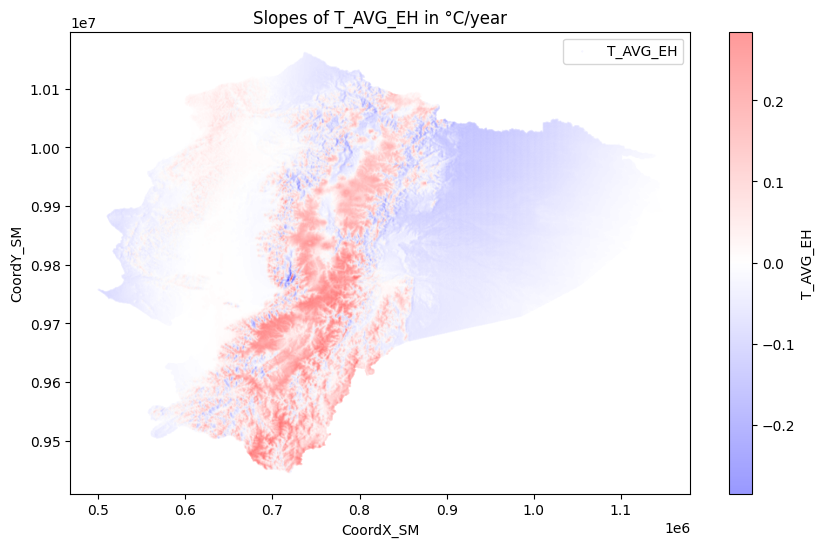

Slopes mean: 0.002984297037066281 °C/year


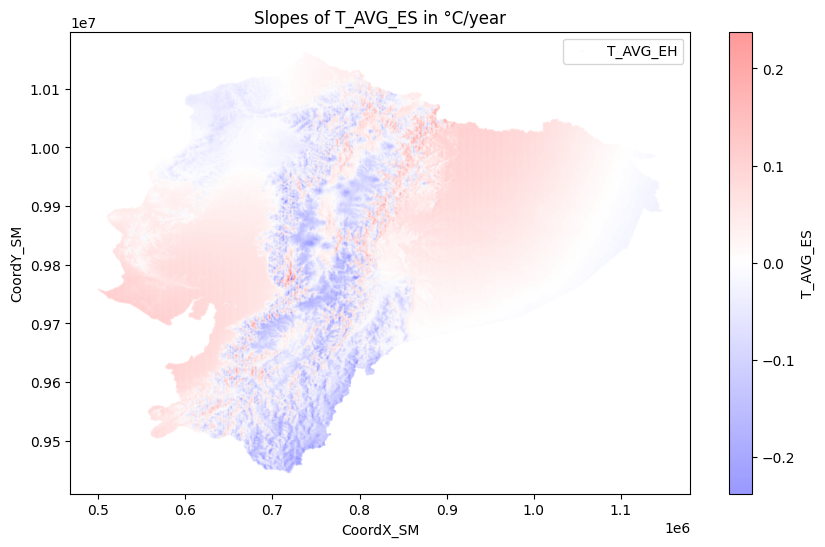

Slopes mean: 0.0022112608030441035 °C/year
T_MAX_EH has missing values
T_MAX_ES has missing values
T_MIN_EH has missing values


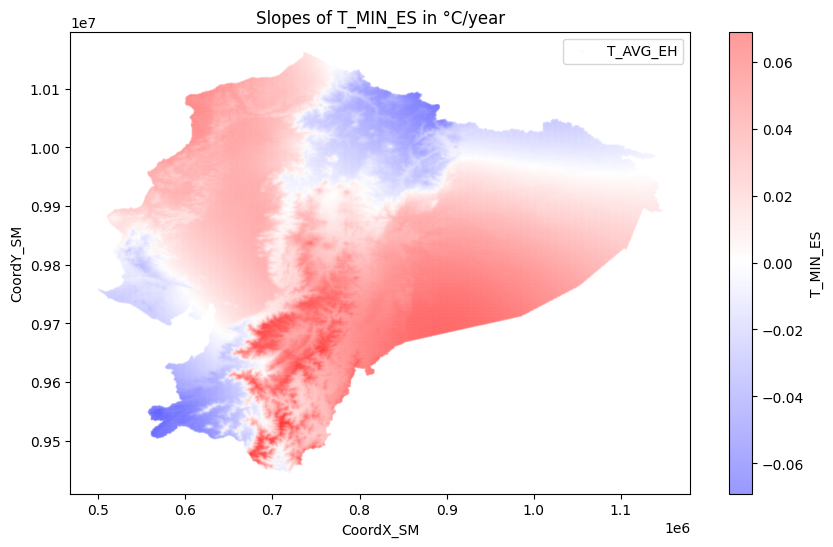

Slopes mean: 0.012862003613614396 °C/year


In [36]:
for t in T:
    
    dt = df

    
    if n_df[t].isnull().sum().sum() > 0:
        print(f'{t} has missing values')
    else:
        
        abs_vmax = n_df[(t,'slope')].abs().max()
        
        plt.figure(figsize=(10, 6))

        plt.scatter(n_df[t].index.get_level_values('Latitude'), n_df[t].index.get_level_values('Longitude'), c=n_df[(t,'slope')], cmap='bwr', label='T_AVG_EH', alpha=0.4, s=0.1, vmin=-abs_vmax, vmax=abs_vmax)
        plt.colorbar(label=t)

        plt.xlabel('CoordX_SM')
        plt.ylabel('CoordY_SM')
        plt.legend()
        plt.title('Slopes of {} in °C/year'.format(t))
        plt.show()
        
        print('Slopes mean:', n_df[(t,'slope')].mean(), '°C/year')


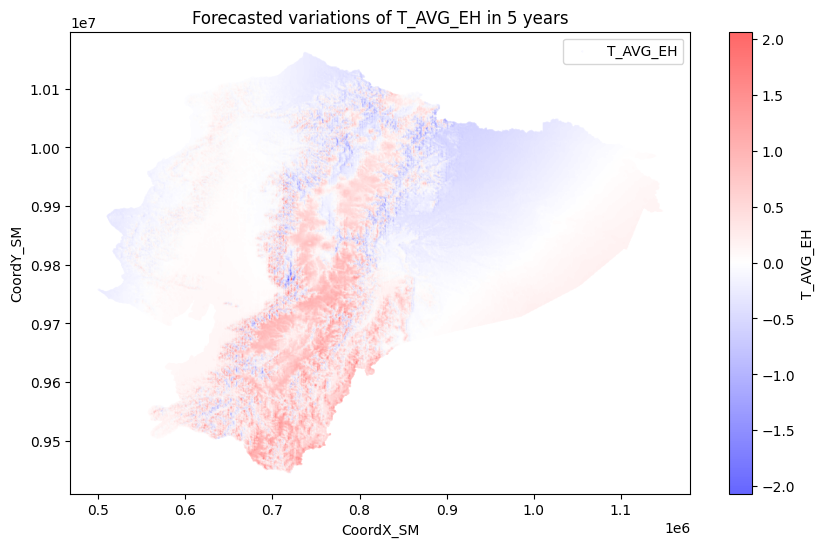

Forecasted variations mean: 0.03757559015971343 °C in 5 years


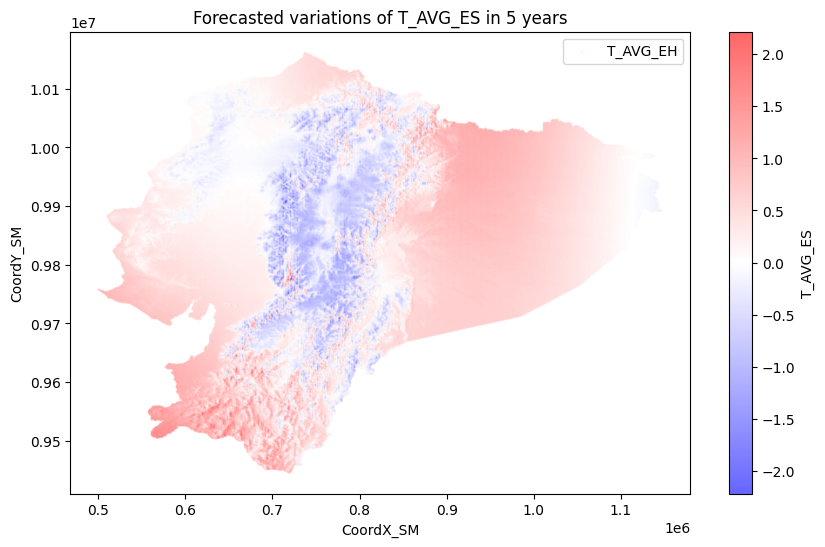

Forecasted variations mean: 0.158871566408746 °C in 5 years
T_MAX_EH has missing values
T_MAX_ES has missing values
T_MIN_EH has missing values


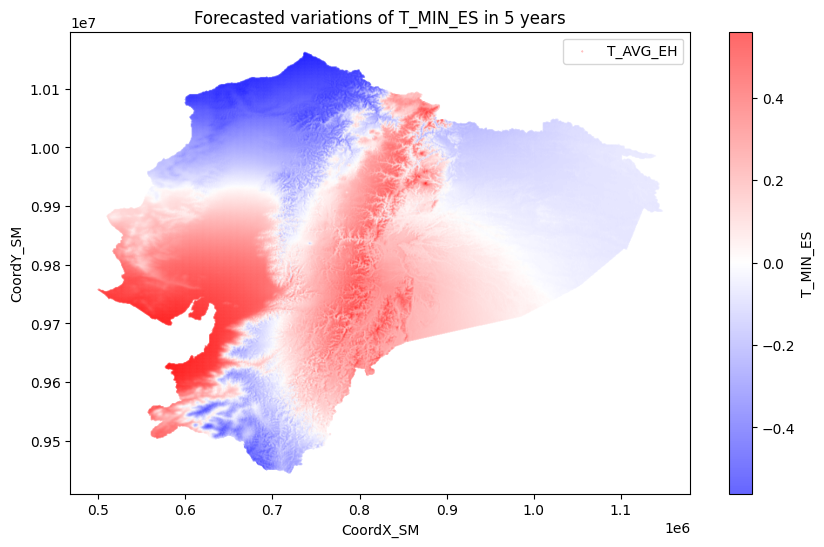

Forecasted variations mean: 0.03677909971942156 °C in 5 years


In [38]:
for t in T:
    
    dt = df

    
    if n_df[t].isnull().sum().sum() > 0:
        print(f'{t} has missing values')
    else:
        
        abs_vmax = (n_df[(t,'prediction')]-n_df[(t,'2010-2013')]).abs().max()
        
        plt.figure(figsize=(10, 6))
        plt.scatter(n_df[t].index.get_level_values('Latitude'), n_df[t].index.get_level_values('Longitude'), c=n_df[(t,'prediction')]-n_df[(t,'2010-2013')], cmap='bwr', label='T_AVG_EH', alpha=0.6, s=0.1, vmin=-abs_vmax, vmax=abs_vmax)
        plt.colorbar(label=t)

        plt.xlabel('CoordX_SM')
        plt.ylabel('CoordY_SM')
        plt.legend()
        plt.title('Forecasted variations of {} in 5 years'.format(t))
        plt.show()
        print('Forecasted variations mean:', (n_df[(t,'prediction')]-n_df[(t,'2010-2013')]).mean(), '°C in 5 years')

# Clusturing

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def cdbw_score(X, labels):
    """
    Calculate the Cluster Dispersion Between (CDbw) index for a clustering result.
    Automatically computes cluster centers from the data and labels.

    Parameters:
    X: Array-like, shape (n_samples, n_features). Input data.
    labels: Array-like, shape (n_samples,). Cluster labels for each sample.

    Returns:
    The CDbw index value.
    """
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(labels))

    # Calculate cluster centers
    cluster_centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        cluster_centers[i] = np.mean(X[labels == i], axis=0)

    # Calculate within-cluster dispersion
    within_cluster_dispersion = 0
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        cluster_center = cluster_centers[i]
        within_cluster_dispersion += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))

    within_cluster_dispersion /= n_samples

    # Calculate between-cluster dispersion
    between_cluster_dispersion = 0
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            distance = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
            between_cluster_dispersion += distance

    between_cluster_dispersion /= (n_clusters * (n_clusters - 1)) / 2

    # Compute CDbw index
    cdbw = within_cluster_dispersion / between_cluster_dispersion

    return cdbw

def get_eval_metric(metric_name):
    if metric_name == 'silhouette':
        eval_metric = silhouette_score
    elif metric_name == 'calinski_harabasz':
        eval_metric = calinski_harabasz_score
    elif metric_name == 'davies_bouldin':
        eval_metric = davies_bouldin_score
    elif metric_name == 'cdbw':
        eval_metric = cdbw_score
    else:
        raise ValueError(f"Unknown evaluation metric: {metric_name}")
    return eval_metric

In [11]:
import numpy as np
import pandas as pd
import itertools
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering


dfc = df.copy()

test_clusters = 10

metrics = ['silhouette', 'calinski_harabasz', 'davies_bouldin', 'cdbw']

scalers = [ 'MinMax', 'Standard', 'None']

# method=['c', 'sp', 'st']

filters = ['T_AVG_EH', 'T_AVG_ES', 'T_MIN_ES']

distances = ['euclidean', 'cosine','chebyshev','correlation' ]

params = [ scalers,filters, distances]

list_params = list(itertools.product(*params))

results = []

for n, (scaler, filter, distance) in tqdm(enumerate(list_params), total=len(list_params)):


    features_size = 4 if filter=='IN' else 3

    if scaler != 'None':
      if scaler == 'MinMax':
        used_scaler = MinMaxScaler()
      else:
        used_scaler = StandardScaler()
      dfcs = pd.DataFrame(used_scaler.fit_transform(dfc), columns=dfc.columns)
    else:
      dfcs = dfc

    df_f = dfcs[filter].sample(frac = 0.02)

    for cluster in range(2,test_clusters+1):
        clust = AgglomerativeClustering(n_clusters=cluster,metric=distance,  linkage='ward' if distance == 'euclidian' else 'average')
        clust.fit_predict(df_f)
        labels = clust.labels_
        for metric in metrics:
            results.append({'metric': metric, 'scaler': scaler, 'filter': filter, 'distance': distance, 'num_clusters': cluster, 'labels': labels, 'score': get_eval_metric(metric)(df_f, labels)})

results = pd.DataFrame(results)


results['scaled_score'] = results.groupby('metric')['score'].transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1, 1)).reshape(-1))

results

  0%|          | 0/36 [00:00<?, ?it/s]

,metric,scaler,filter,distance,num_clusters,labels,score,scaled_score
0,silhouette,MinMax,T_AVG_EH,euclidean,2,"[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0.742035,0.985015
1,calinski_harabasz,MinMax,T_AVG_EH,euclidean,2,"[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",21812.246327,0.534872
2,davies_bouldin,MinMax,T_AVG_EH,euclidean,2,"[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0.356336,0.001491
3,cdbw,MinMax,T_AVG_EH,euclidean,2,"[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0.165851,0.007717
4,silhouette,MinMax,T_AVG_EH,euclidean,3,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.611201,0.885876
...,...,...,...,...,...,...,...,...
1291,cdbw,None,T_MIN_ES,correlation,9,"[0, 0, 0, 2, 2, 0, 0, 5, 2, 5, 0, 0, 0, 1, 4, ...",0.617433,0.048723
1292,silhouette,None,T_MIN_ES,correlation,10,"[2, 9, 2, 0, 0, 2, 2, 5, 0, 5, 2, 2, 9, 1, 4, ...",-0.399709,0.119864
1293,calinski_harabasz,None,T_MIN_ES,correlation,10,"[2, 9, 2, 0, 0, 2, 2, 5, 0, 5, 2, 2, 9, 1, 4, ...",328.176176,0.007910
1294,davies_bouldin,None,T_MIN_ES,correlation,10,"[2, 9, 2, 0, 0, 2, 2, 5, 0, 5, 2, 2, 9, 1, 4, ...",10.996700,0.496355


/tmp/ipykernel_2991/813205064.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(


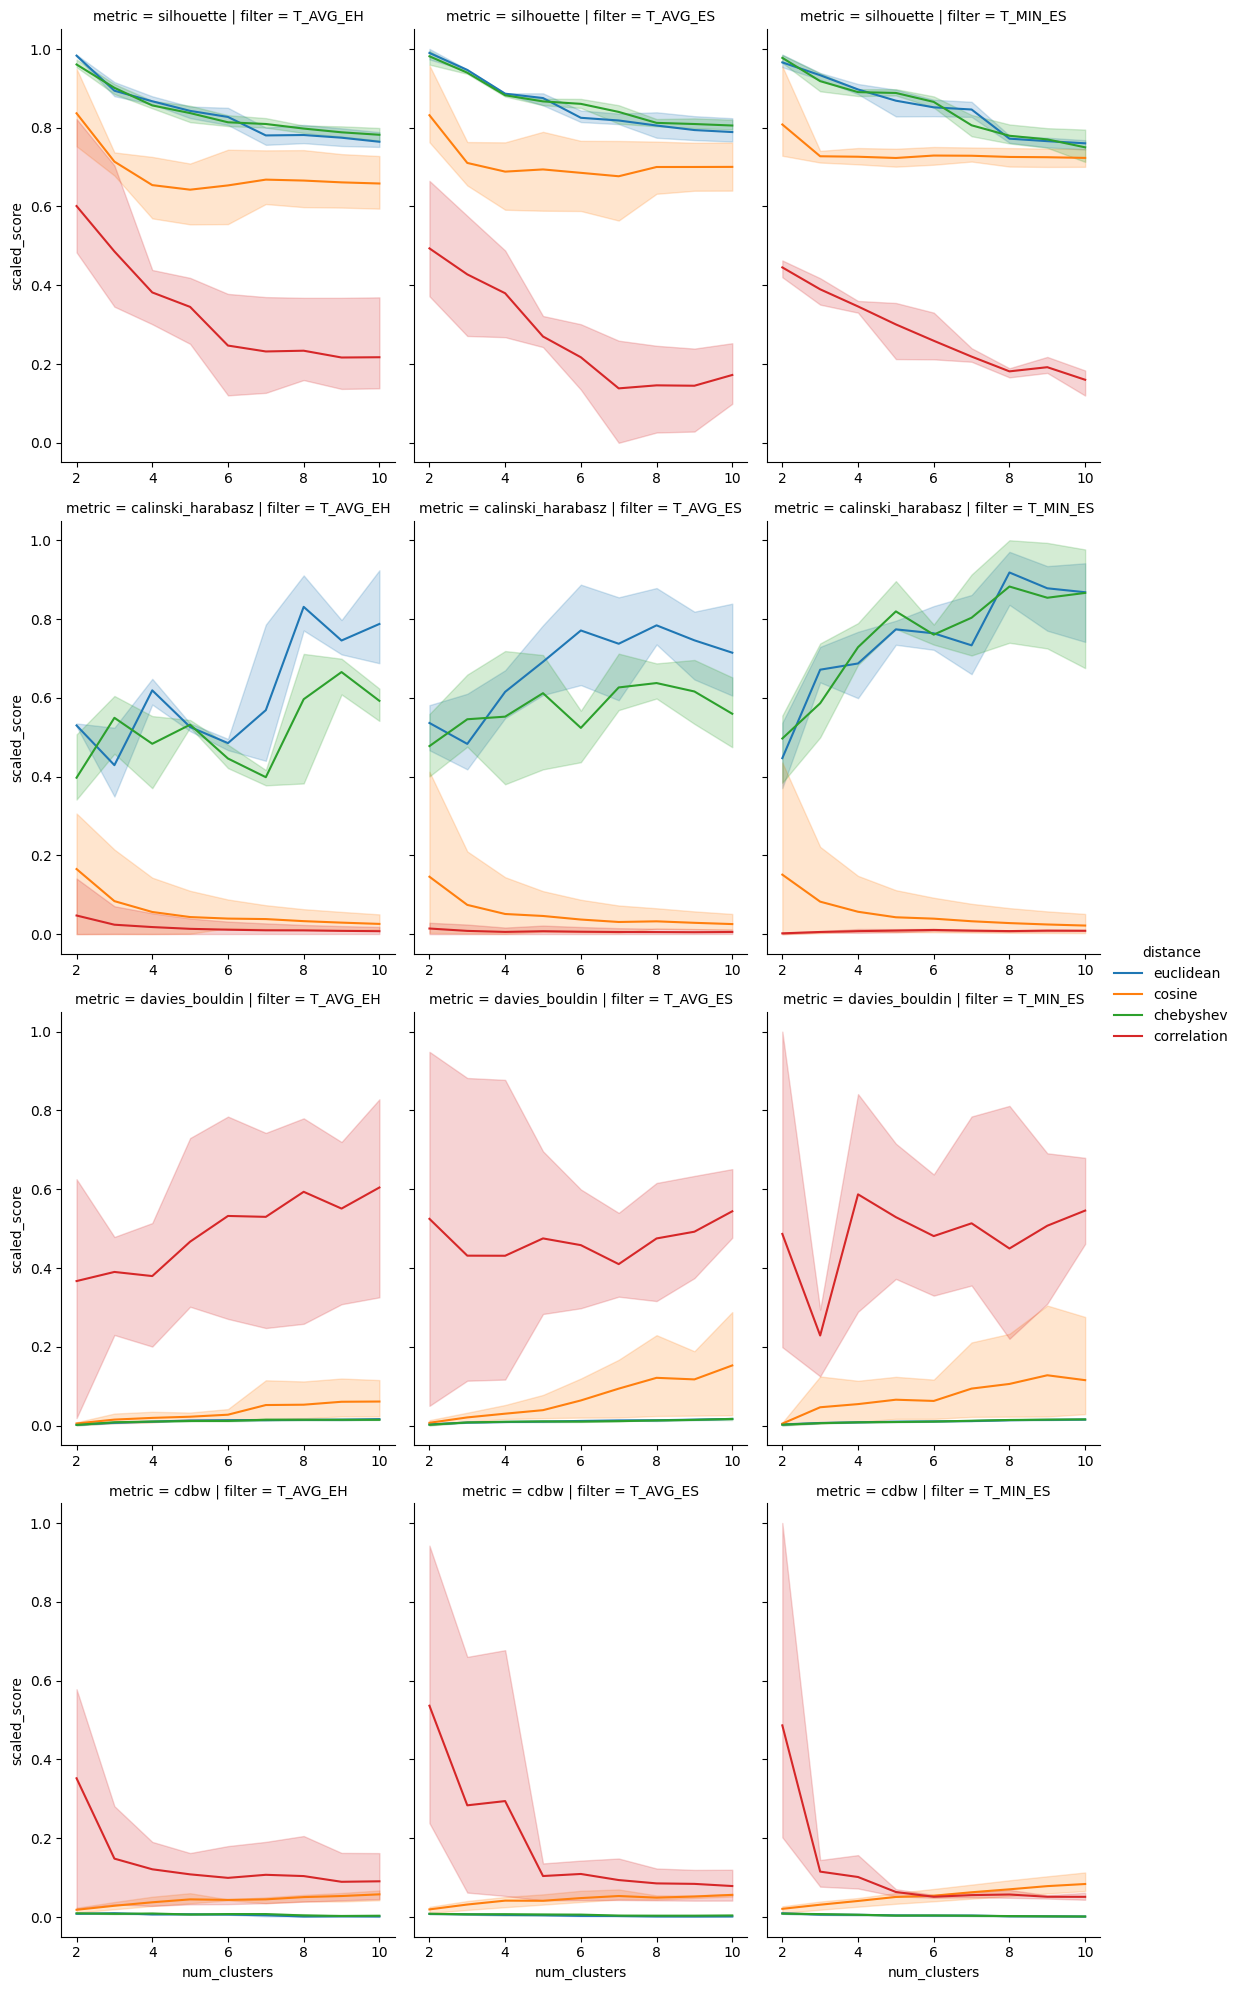

In [13]:
import seaborn as sns
sns.relplot(
    data=results,
    x='num_clusters',
    y="scaled_score",
    hue="distance",
    row='metric',
    col="filter",
    # size='scaler',
    kind="line", palette=sns.color_palette("tab10"),
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)